In [1]:
from langchain_ollama import OllamaEmbeddings
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [2]:
def get_distance_l2(point_a, point_b):
    return np.sqrt(np.sum((point_a - point_b) ** 2))

In [3]:
embeddings_generator = OllamaEmbeddings(
    model='mxbai-embed-large:latest',
)

In [4]:
documents = {
    "Gatos": "Los gatos son animales domésticos conocidos por su independencia, agilidad y habilidades de caza. Son compañeros ideales para quienes buscan una mascota que requiera cuidados moderados. Además, su naturaleza reservada y elegante los convierte en animales apreciados en muchos hogares.",
    "Perros": "Los perros son animales leales y sociables que han acompañado a los humanos durante siglos. Son conocidos por su capacidad de aprendizaje y afecto incondicional. Además de ser mascotas fieles, pueden desempeñar funciones importantes como perros de servicio, de terapia o de trabajo en diversas áreas, como seguridad y rescate.",
    "Ollama": "Ollama es una herramienta que permite ejecutar modelos de lenguaje de manera local, como Llama 3. Agrupa en un solo paquete los pesos del modelo, la configuración y los datos necesarios, optimizando así el uso de los recursos del sistema, incluida la GPU. Esto facilita el desarrollo de aplicaciones de inteligencia artificial en entornos controlados.",
    "Python": "Python es un lenguaje de programación versátil y ampliamente utilizado en desarrollo web, ciencia de datos, inteligencia artificial y automatización. Su sintaxis sencilla y la vasta cantidad de bibliotecas disponibles, como TensorFlow y Pandas, lo convierten en una opción ideal tanto para principiantes como para desarrolladores experimentados.",
    "React": "React es una biblioteca de JavaScript desarrollada por Meta (antes Facebook) para la construcción de interfaces de usuario interactivas y eficientes. Su enfoque basado en componentes reutilizables permite a los desarrolladores crear aplicaciones web escalables y fáciles de mantener"
}

In [5]:
embeddings_generator.embed_documents([documents['Gatos']])

[[0.01977471,
  0.017362967,
  0.043488603,
  0.0055186828,
  0.02465915,
  -0.0302884,
  -0.025101092,
  0.026079787,
  0.012984179,
  0.0075542154,
  0.025910724,
  0.019989679,
  -0.0195063,
  0.019855872,
  0.011004212,
  0.016559,
  -0.003300903,
  -0.053019587,
  -0.033629484,
  0.049957626,
  -0.029225325,
  0.019511536,
  -0.082365714,
  -0.0030118297,
  -0.015132174,
  0.036582153,
  0.08811451,
  -0.0034893493,
  0.0606663,
  -0.02590157,
  0.021259263,
  0.036642104,
  0.03226243,
  -0.05238831,
  0.0155813135,
  -0.015761528,
  -0.00088491273,
  -0.012211238,
  0.0043967026,
  -0.038938545,
  0.06288172,
  -0.029469987,
  0.028092109,
  -0.028771609,
  -0.037862808,
  0.0014377737,
  0.006181806,
  -0.0043913857,
  -0.0055065462,
  -0.05065657,
  0.041187346,
  0.012966677,
  0.016501777,
  0.011936304,
  -0.037235923,
  -0.0029027418,
  0.022916038,
  -0.031513616,
  -0.018051518,
  0.012455897,
  0.041371517,
  0.008461233,
  0.019426286,
  -0.0192556,
  -0.0012315945,
  

In [6]:
len(embeddings_generator.embed_documents([documents['Gatos']])[0])

1024

In [7]:
embeddings = embeddings_generator.embed_documents(list(documents.values()))

In [8]:
texto_perros = np.array(embeddings[1])
texto_gatos = np.array(embeddings[0])

get_distance_l2(texto_perros, texto_gatos)

np.float64(0.5314084248238564)

In [9]:
texto_python = np.array(embeddings[3])

get_distance_l2(texto_gatos, texto_python)

np.float64(0.9382798838235488)

In [10]:
pca = PCA(n_components=2)
pca_embeddings = pca.fit_transform(embeddings)

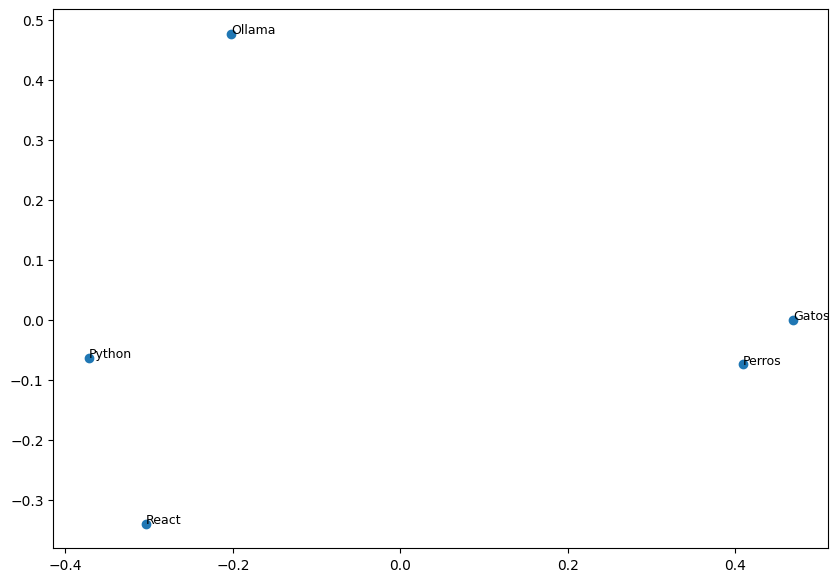

In [11]:
plt.figure(figsize=(10, 7))
plt.scatter(pca_embeddings[:, 0], pca_embeddings[:, 1])
for i, label in enumerate(documents.keys()):
    plt.text(pca_embeddings[i, 0], pca_embeddings[i, 1], label, fontsize=9)

plt.show()

In [12]:
preguntas = {
    "mascotas": "Hablame sobre mascotas",
    "programacion" : "Hablame de herramientas de programacion"
}

In [13]:
preguntas_embeddings = embeddings_generator.embed_documents(list(preguntas.values()))

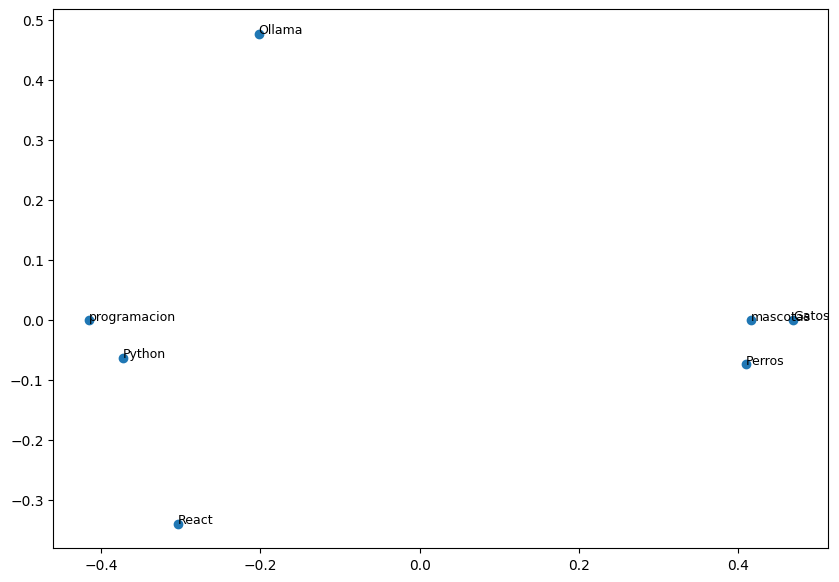

In [14]:
pca_embeddings = np.concatenate((pca_embeddings, pca.fit_transform(preguntas_embeddings)), axis=0)

plt.figure(figsize=(10, 7))
plt.scatter(pca_embeddings[:, 0], pca_embeddings[:, 1])
for i, label in enumerate(list(documents.keys()) + list(preguntas.keys())):
    plt.text(pca_embeddings[i, 0], pca_embeddings[i, 1], label, fontsize=9)

plt.show()